# Reviewing Classification Problems

**GOALS**:
- Identify big idea with `LogisticRegression`
- Evaluate performance in terms of Accuracy, Precision, and Recall


In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, classification_report
from sklearn.pipeline import make_pipeline
from sklearn.datasets import load_breast_cancer

In [2]:
cancer = load_breast_cancer()

In [3]:
df = pd.DataFrame(cancer.data, columns= cancer.feature_names)

In [4]:
df['target'] = cancer.target

In [5]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
mean radius                569 non-null float64
mean texture               569 non-null float64
mean perimeter             569 non-null float64
mean area                  569 non-null float64
mean smoothness            569 non-null float64
mean compactness           569 non-null float64
mean concavity             569 non-null float64
mean concave points        569 non-null float64
mean symmetry              569 non-null float64
mean fractal dimension     569 non-null float64
radius error               569 non-null float64
texture error              569 non-null float64
perimeter error            569 non-null float64
area error                 569 non-null float64
smoothness error           569 non-null float64
compactness error          569 non-null float64
concavity error            569 non-null float64
concave points error       569 non-null float64
symmetry error             569 

In [7]:
X = df[['mean radius', 'mean fractal dimension']]
X_train, X_test, y_train, y_test = train_test_split(X, cancer.target)
clf = LogisticRegression()

In [8]:
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [9]:
pred = clf.predict(X_test)
print(classification_report(pred, y_test))

             precision    recall  f1-score   support

          0       0.65      0.89      0.75        36
          1       0.96      0.84      0.90       107

avg / total       0.88      0.85      0.86       143



In [10]:
%%bash
pip install mglearn

  Running setup.py bdist_wheel for mglearn: started
  Running setup.py bdist_wheel for mglearn: finished with status 'done'
  Stored in directory: /Users/brianlouie/Library/Caches/pip/wheels/3b/81/34/a54d61d5d108dfcb016bcd8f4f7d8cc0538994f07704714b8d
Successfully built mglearn


distributed 1.21.8 requires msgpack, which is not installed.


In [11]:
import mglearn

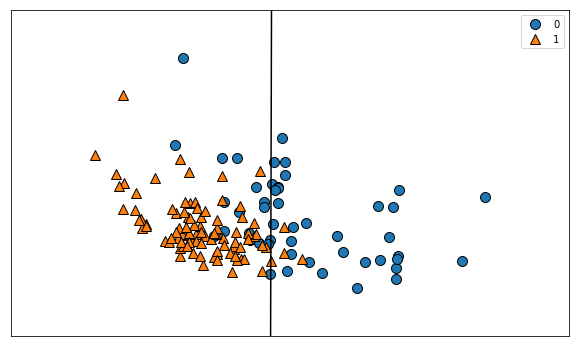

In [12]:
#X, y = mglearn.datasets.make_forge()
clf = clf.fit(X_train, y_train)
plt.figure(figsize = (10, 6))
mglearn.plots.plot_2d_separator(clf, np.array(X_test))
mglearn.discrete_scatter(X_test['mean radius'], X_test['mean fractal dimension'], y_test)
plt.ylim(min(X_test['mean fractal dimension'])-.01, max(X_test['mean fractal dimension'])+.01)
plt.legend()

#drawing a decision boundary for the results

In [13]:
print(classification_report(clf.predict(X_test), y_test))

             precision    recall  f1-score   support

          0       0.65      0.89      0.75        36
          1       0.96      0.84      0.90       107

avg / total       0.88      0.85      0.86       143



In [13]:
from sklearn.metrics import confusion_matrix

In [14]:
confusion_matrix(clf.predict(X_test), y_test)

array([[44,  3],
       [16, 80]])

### Problem

Using two other pairs of inputs, see if you can improve upon the recall score for the 1 category.  Plot the decision boundary and classes as demonstrated above.  Pay close attention to identifying the points that are contributing to differences in precision and recall.

In [21]:
X_practice = df[['mean concavity', 'mean area']]
X_train, X_test, y_train, y_test = train_test_split(X_practice, cancer.target)
clf = LogisticRegression()

In [22]:
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [23]:
pred_practice = clf.predict(X_test)
print(classification_report(pred_practice, y_test))

             precision    recall  f1-score   support

          0       0.76      0.90      0.83        42
          1       0.96      0.88      0.92       101

avg / total       0.90      0.89      0.89       143



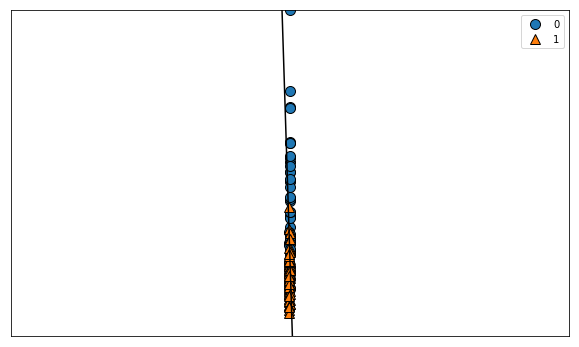

In [24]:
clf = clf.fit(X_train, y_train)
plt.figure(figsize = (10, 6))
mglearn.plots.plot_2d_separator(clf, np.array(X_test))
mglearn.discrete_scatter(X_test['mean concavity'], X_test['mean area'], y_test)
plt.ylim(min(X_test['mean concavity'])-.01, max(X_test['mean area'])+.01)
plt.legend()

In [30]:
X_practice2 = df[['compactness error', 'worst symmetry']]
X_train, X_test, y_train, y_test = train_test_split(X_practice2, cancer.target)
clf = LogisticRegression()

In [31]:
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [32]:
pred_practice2 = clf.predict(X_test)
print(classification_report(pred_practice2, y_test))

             precision    recall  f1-score   support

          0       0.18      0.88      0.30         8
          1       0.99      0.77      0.87       135

avg / total       0.95      0.78      0.84       143



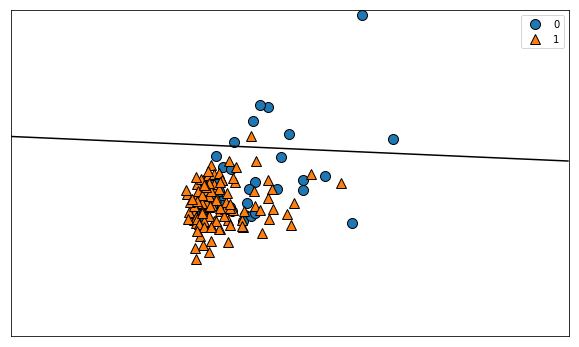

In [33]:
clf = clf.fit(X_train, y_train)
plt.figure(figsize = (10, 6))
mglearn.plots.plot_2d_separator(clf, np.array(X_test))
mglearn.discrete_scatter(X_test['compactness error'], X_test['worst symmetry'], y_test)
plt.ylim(min(X_test['compactness error'])-.01, max(X_test['worst symmetry'])+.01)
plt.legend()

### Problem

Using the PIMA diabetes dataset, your goal is to build a classifier that is:

1. Accurate
2. Appropriate

For information about the data, please see the brief description of the variables here: https://www.kaggle.com/uciml/pima-indians-diabetes-database/home 

Your results should include a clear framing of the question, brief description of the approach you used, and suggestions as to what else might be done to effect a better model.

In [34]:
pima = pd.read_csv('data/pima_diabetes.csv', index_col=0)

In [35]:
pima.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [36]:
pima.info()

#All patients are females

<class 'pandas.core.frame.DataFrame'>
Int64Index: 768 entries, 0 to 767
Data columns (total 9 columns):
preg     768 non-null int64
plas     768 non-null int64
pres     768 non-null int64
skin     768 non-null int64
test     768 non-null int64
mass     768 non-null float64
pedi     768 non-null float64
age      768 non-null int64
class    768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 60.0 KB


In [39]:
pima.columns = (['pregnant', 'glucose_test', 'blood_pressure', 'skin_thick', 'insulin_test', 'bmi', 'pedi_function', 'age', 'class'])

In [40]:
pima.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 768 entries, 0 to 767
Data columns (total 9 columns):
pregnant          768 non-null int64
glucose_test      768 non-null int64
blood_pressure    768 non-null int64
skin_thick        768 non-null int64
insulin_test      768 non-null int64
bmi               768 non-null float64
pedi_function     768 non-null float64
age               768 non-null int64
class             768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 60.0 KB


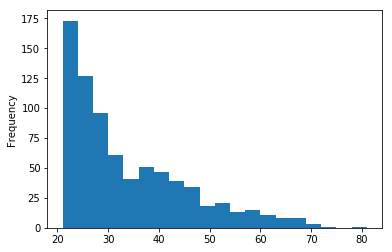

In [46]:
pima.age.plot.hist(bins=20)

#right-skewed, many of the subjects are under 40 years of age
#half are under 30 years old

In [61]:
pima.age.mean()
pima.age.median()

29.0

In [47]:
pima.pregnant.value_counts()

1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: pregnant, dtype: int64

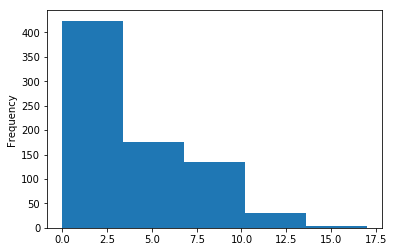

In [50]:
pima.pregnant.plot.hist(bins=5)

#right-skewed, many of subjects pregnant less than 3x

In [57]:
X = pima[['pregnant', 'bmi']]
y = pima['class']
X_train, X_test, y_train, y_test = train_test_split(X, y)
clf = LogisticRegression()

In [58]:
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [59]:
pred_pima = clf.predict(X_test)
print(classification_report(pred_pima, y_test))

             precision    recall  f1-score   support

          0       0.90      0.70      0.79       159
          1       0.31      0.64      0.42        33

avg / total       0.80      0.69      0.73       192



In [62]:
from sklearn.metrics import accuracy_score

In [63]:
accuracy_score(y_test, clf.predict(X_test))

0.6927083333333334